In [1]:
import os
import sys
sys.path.append("..")

import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

from models.saliency.optim_methods import RealTimeSaliency
from models.network.resnet import resnet50
from utils import load_image, normalize
from options import get_opts

plt.rcParams["figure.figsize"] = (15,15)

In [2]:
workspace_dir = '/home/dohun/CODE/Python/Lab/RelEx'
data_root_dir = os.path.join(workspace_dir, 'data')

img_name = 'ILSVRC2012_val_00023552'
# img_name = 'ILSVRC2012_val_00019351'


if torch.cuda.is_available():
    device = torch.device("cuda") 
    print(device)

cuda


In [3]:
img_full_dir = os.path.join(data_root_dir, img_name + '.JPEG')
pre_img, orig_img = load_image(img_full_dir, gpu=True)

In [5]:
net = resnet50(encoder=True, robust=False).eval().to(device)
target_cls = net(pre_img)[-1].max(1)[1]

In [6]:
realtime_sal_attr = RealTimeSaliency(net, device=device)

In [7]:
sal = realtime_sal_attr(pre_img, target_cls)[0]

In [8]:
norm_sal = normalize(sal.detach().cpu(), percentile=False)
images = [orig_img.detach().cpu()[0].permute(1,2,0), sal.detach().cpu()[0,0], norm_sal]

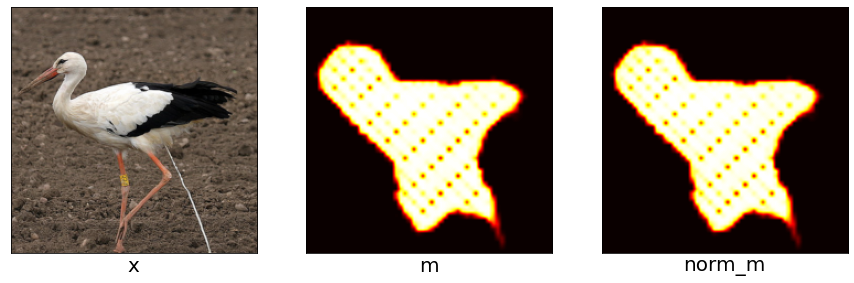

In [9]:
fig = plt.figure()
rows = 1
cols = 3
 
xlabels = ['x', 'm', 'norm_m']
 
for i, img in enumerate(images):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(img, cmap='hot')
    ax.set_xlabel(xlabels[i], fontsize=20)
    ax.set_xticks([]), ax.set_yticks([])

plt.show()